# <center> ML-3. Обучение с учителем: классификация
---

### 2. Логистическая регрессия

##### ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ В SKLEARN

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

import warnings # для игнорирования предупреждений
#Игнорируем предупреждения
warnings.filterwarnings('ignore')

# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn-v0_8') 

In [2]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Pregnancies — количество беременностей;

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе;

BloodPressure — диастолическое артериальное давление (мм рт. ст.);

SkinThickness — толщина кожной складки трицепса (мм);

BMI — индекс массы тела (вес в кг/(рост в м)2);

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости);

Age — возраст;

Outcome — наличие диабета (0 — нет, 1 — да), целевой признак.

In [3]:
print(diabetes_data.shape)
#(757, 8)

(757, 8)


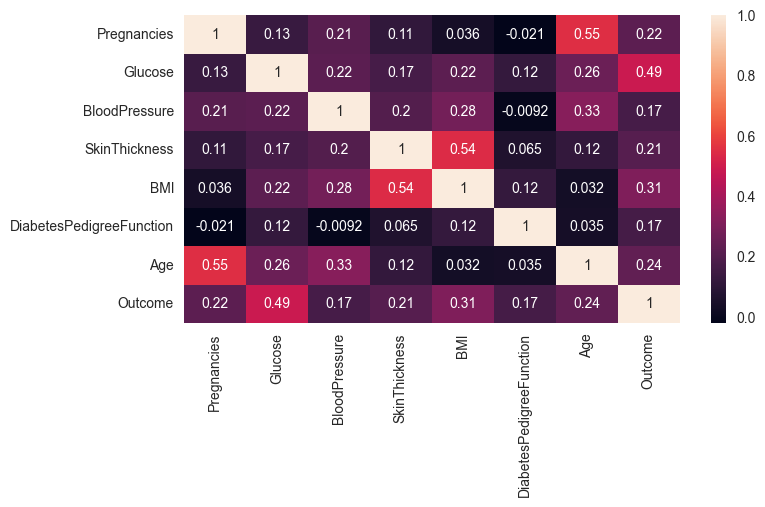

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

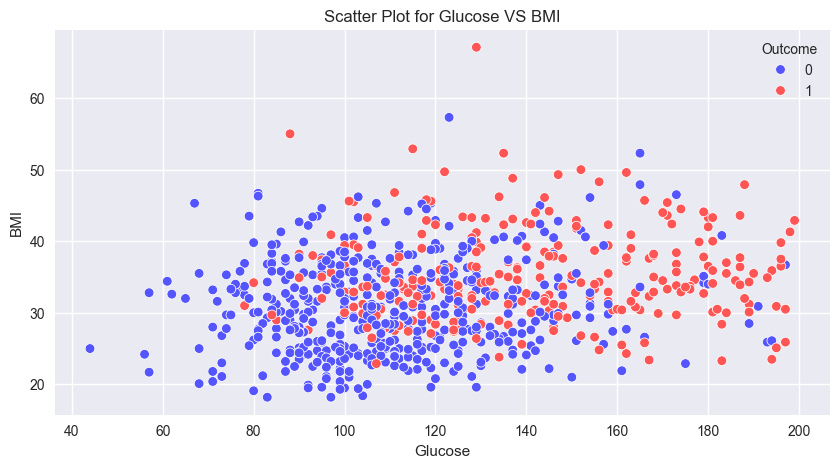

In [5]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);

#Задаём название графику
ax.set_title('Scatter Plot for Glucose VS BMI');

In [6]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [7]:
from sklearn import linear_model #линейные модели

In [8]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

# w0: [-8.24898965]
# w1, w2: [[0.03779275 0.0875742 ]]

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


In [9]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание вероятностей:
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

# Predicted probabilities: [[0.05 0.95]]

Predicted probabilities: [[0.05 0.95]]


In [10]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = pd.DataFrame({'Glucose': [180], 'BMI': [51]})
#Делаем предсказание класса:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))
# Predicted class: [1]

Predicted class: [1]


In [11]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

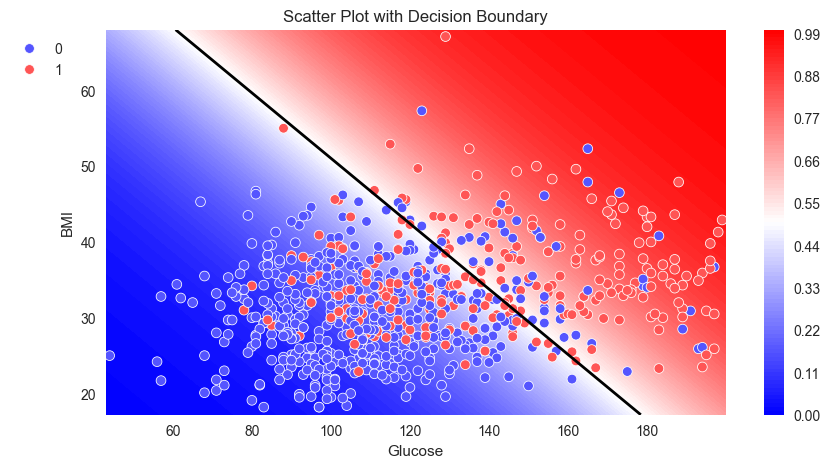

In [12]:
plot_probabilities_2d(X, y, log_reg_2d)

In [13]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [14]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

In [15]:
#Создадим временную таблицу X
X_temp = X.copy()
#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


Задание 2.9

Для выполнения задания скачайте набор данных.

Таблица состоит из четырёх столбцов:

SNo — номер строки (данный столбец вам не понадобится, вы можете сразу его удалить);

X_1 и X_2 — факторы;

y — целевой признак.

Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией plot_probabilities_2d(), которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

In [16]:
task_data = pd.read_csv('data/task_data.csv')
task_data

,SNo,X_1,X_2,y
0,0,-0.869144,0.389310,0.0
1,1,-0.993467,-0.610591,0.0
2,2,-0.834064,0.239236,0.0
3,3,-0.136471,0.632003,1.0
4,4,0.403887,0.310784,1.0
...,...,...,...,...
95,95,0.531635,-0.479185,1.0
96,96,-0.650192,0.655303,1.0
97,97,0.985299,0.118333,1.0
98,98,-0.275289,0.005730,1.0


In [17]:
X = task_data.drop(['SNo','y'], axis=1)
y = task_data['y']

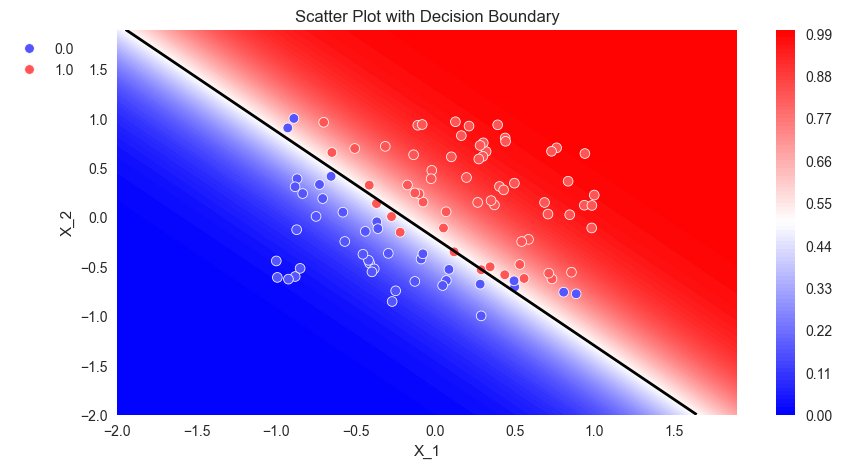

In [18]:
log_reg = linear_model.LogisticRegression(solver='sag',random_state=42)
log_reg.fit(X, y)
plot_probabilities_2d(X, y, log_reg)

---
### 3. Метрики классификации. Преимущества и недостатки логистической регрессии

##### РАСЧЁТ МЕТРИК НА PYTHON

In [19]:
from sklearn import metrics

confusion_matrix() — расчёт матрицы ошибок,

accuracy_score() — расчёт accuracy,

precision_score() — расчёт precision,

recall_score() — расчёт recall,

f1_score() — расчёт F<sub>1</sub>-меры.

In [20]:
#Делаем предсказание моделью, обученной на двух признаках 
y_pred1 = log_reg_2d.predict(diabetes_data[['Glucose', 'BMI']])
#Делаем предсказание моделью, обученной на всех признаках 
y_pred2 = log_reg_full.predict(diabetes_data.drop('Outcome', axis=1))

In [21]:
# т.к. в задании 2.9 был другой y
y = diabetes_data['Outcome']

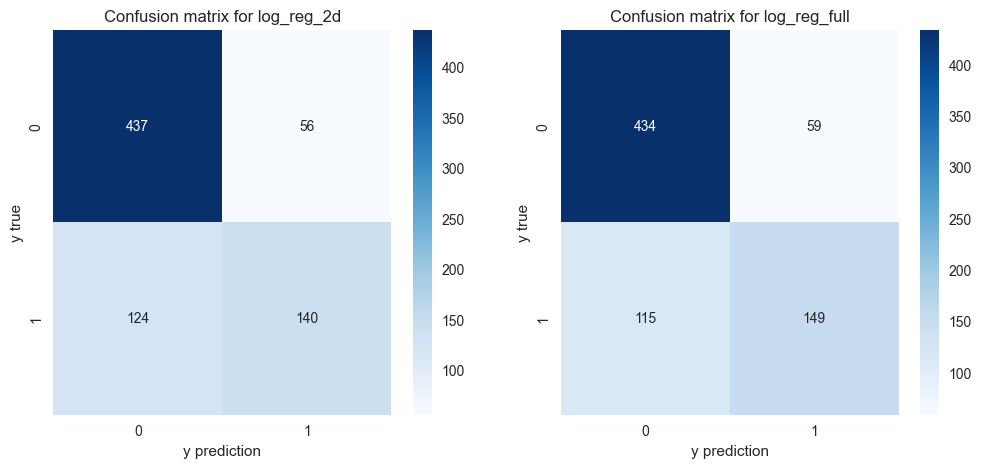

In [22]:
#Строим матрицы ошибок для каждой из моделей
confusion_matrix1 = metrics.confusion_matrix(y, y_pred1)
confusion_matrix2 = metrics.confusion_matrix(y, y_pred2)
#Визуализируем матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix1, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix for log_reg_2d')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
#Строим тепловую карту для второй матрицы ошибок
sns.heatmap(confusion_matrix2, annot=True, fmt='', ax=axes[1], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[1].set_title('Confusion matrix for log_reg_full')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true');

In [23]:
#Модель log_reg_2d:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred1)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred1)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred1)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred1)))
 
# Accuracy: 0.76
# Precision: 0.71
# Recall: 0.53
# F1 score: 0.61

Accuracy: 0.76
Precision: 0.71
Recall: 0.53
F1 score: 0.61


In [24]:
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y, y_pred2)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y, y_pred2)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y, y_pred2)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y, y_pred2)))
 
# Accuracy: 0.77
# Precision: 0.72
# Recall: 0.56
# F1 score: 0.63

Accuracy: 0.77
Precision: 0.72
Recall: 0.56
F1 score: 0.63


In [25]:
print(metrics.classification_report(y, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       493
           1       0.72      0.56      0.63       264

    accuracy                           0.77       757
   macro avg       0.75      0.72      0.73       757
weighted avg       0.76      0.77      0.76       757



In [26]:
#Считаем вероятности наличия диабета для каждого из пациентов
#Нас интересует только вероятность класса (второй столбец)
y_proba_pred = log_reg_full.predict_proba(diabetes_data.drop('Outcome', axis=1))[:, 1]
#Для удобства завернём numpy-массив в Pandas Series
y_proba_pred = pd.Series(y_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #Пациентов, для которых вероятность наличия диабета > threshold, относим к классу 1
    #В противном случае — к классу 0
    y_pred = y_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y, y_pred))
    precision_scores.append(metrics.precision_score(y, y_pred))
    f1_scores.append(metrics.f1_score(y, y_pred))

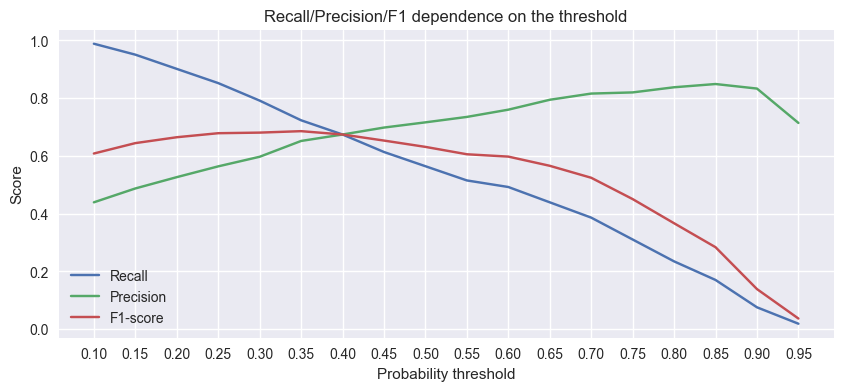

In [27]:
#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')
#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
 
#Даём графику название и подписываем оси
ax.set_title('Recall/Precision/F1 dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
#Устанавливаем отметки по оси x
ax.set_xticks(thresholds) 
#Отображаем легенду
ax.legend();

In [28]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.4
#Пациентов, для которых вероятность наличия диабета > 0.4, относим к классу 1
#В противном случае — к классу 0
y_pred_opt = y_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y, y_pred_opt))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       493
           1       0.67      0.67      0.67       264

    accuracy                           0.77       757
   macro avg       0.75      0.75      0.75       757
weighted avg       0.77      0.77      0.77       757



In [29]:
# Задание 3.6
# У вас есть истинные ответы 
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
# и предсказанные ответы 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
# Вычислите значение метрики precision.
# Ответ округлите до сотых.

round(metrics.precision_score(y_true, y_pred), 2)

0.75

In [30]:
# Задание 3.7
# У вас есть истинные ответы 
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
# и предсказанные ответы 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
# Вычислите значение метрики recall.
# Ответ округлите до сотых.
round(metrics.recall_score(y_true, y_pred), 2)

0.6

In [31]:
# Задание 3.8
# У вас есть истинные ответы 
y_true = [0, 0, 1, 1, 1, 1, 0, 1] 
# и предсказанные ответы 
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
# Вычислите значение метрики F1.
# Ответ округлите до сотых.
round(metrics.f1_score(y_true, y_pred), 2)

0.67

---
### 4. Мультиклассовая классификация

##### МУЛЬТИКЛАССОВАЯ КЛАССИФИКАЦИЯ НА PYTHON

In [32]:
penguins_data = sns.load_dataset('penguins')
penguins_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


species — класс пингвина ('Adelie', 'Chinstrap', 'Gentoo'), целевой признак;

island — остров, на котором живёт пингвин ('Torgersen', 'Biscoe', 'Dream');

bill_length_mm — длина клюва в миллиметрах;

bill_depth_mm — толщина клюва в миллиметрах;

flipper_length_mm — длина крыльев;

body_mass_g — масса;

sex — пол ('Male', 'Female').

In [33]:
penguins_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [34]:
penguins_data = penguins_data.dropna()

In [35]:
X = penguins_data.drop('species', axis=1)
y = penguins_data['species']
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [36]:
X_dummies = pd.get_dummies(X)
X_dummies.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,False,True


In [37]:
#Создаём объект класса LogisticRegression
log_reg = linear_model.LogisticRegression(
    multi_class='multinomial', #мультиклассовая классификация
    max_iter=1000, #количество итераций, выделенных на сходимость
    random_state=42 #генерация случайных чисел
)
 
#Обучаем модель 
log_reg.fit(X_dummies, y)
#Делаем предсказание вероятностей
y_pred_proba = np.round(log_reg.predict_proba(X_dummies), 2)
#Делаем предсказание класса
y_pred = log_reg.predict(X_dummies)

In [38]:
#Создаём DataFrame из вероятностей
y_pred_proba_df = pd.DataFrame(
    y_pred_proba, 
    columns=['Adelie', 'Chinstrap', 'Gentoo']
)
#Создаём DataFrame из предсказанных классов
y_pred_df = pd.DataFrame(
    y_pred, 
    columns=['Predicted Class']
)
#Объединяем таблицы по вертикальной оси
y_df = pd.concat([y_pred_proba_df, y_pred_df], axis=1)
#Выбираем пять случайных строк
y_df.sample(5, random_state=2)

,Adelie,Chinstrap,Gentoo,Predicted Class
277,0.00,0.00,1.0,Gentoo
223,0.00,0.00,1.0,Gentoo
7,0.77,0.23,0.0,Adelie
160,0.00,1.00,0.0,Chinstrap
65,1.00,0.00,0.0,Adelie


In [39]:
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       146
   Chinstrap       1.00      1.00      1.00        68
      Gentoo       1.00      1.00      1.00       119

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



---
### 6. Деревья решений

##### ПРОЦЕСС ПОСТРОЕНИЯ ДЕРЕВА РЕШЕНИЙ

```python
def build_decision_tree(X, y):
    node = Node()
    if stopping_criterion(X, y) is True:
        node = create_leaf_with_prediction(y)
	return node
    else:
        X_left, y_left, X_right, y_right = best_split(X, y)
        node.left = build_decision_tree(X_left, y_left)
        node.right = build_decision_tree(X_right, y_right)
```

##### ДЕРЕВЬЯ РЕШЕНИЙ В SKLEARN

In [40]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


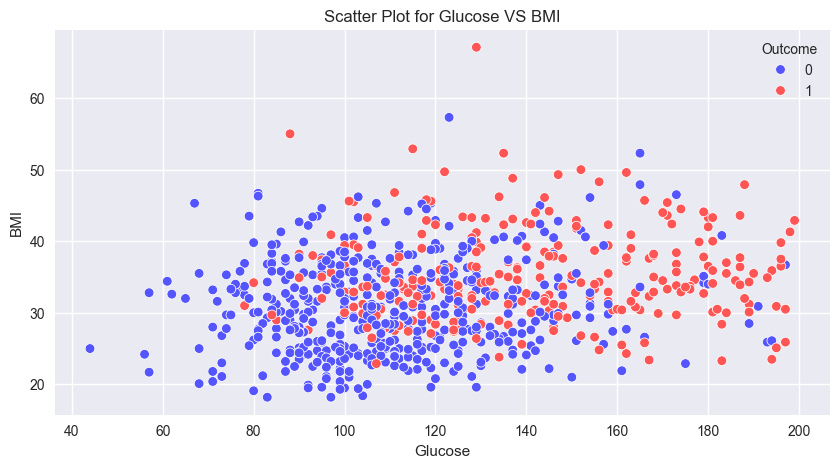

In [41]:
fig, ax = plt.subplots(figsize = (10, 5)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);
#Задаём название графика
ax.set_title('Scatter Plot for Glucose VS BMI');

In [42]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [43]:
from sklearn import tree #модели деревьев решения

Основные параметры DecisionTreeClassifier

* `criterion` — критерий информативности ('gini' — критерий Джини и 'entropy' — энтропия Шеннона).

* `max_depth` — максимальная глубина дерева (по умолчанию — None, глубина дерева не ограничена).

* `max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве (по умолчанию — None, то есть обучение производится на всех признаках). Нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.

* `min_samples_leaf` — минимальное число объектов в листе (по умолчанию — 1). У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те решающие правила, которые верны как минимум для пяти объектов.

* `random_state` — число, отвечающее за генерацию случайных чисел.

In [44]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности 
    max_depth=3, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

Основные параметры функции plot_tree() из модуля tree:

* `decision_tree` — объект обученного дерева решений,
* `feature_names` — наименования факторов,
* `class_names` — названия классов,
* `filled` — добавлять ли расцветку вершин графа.

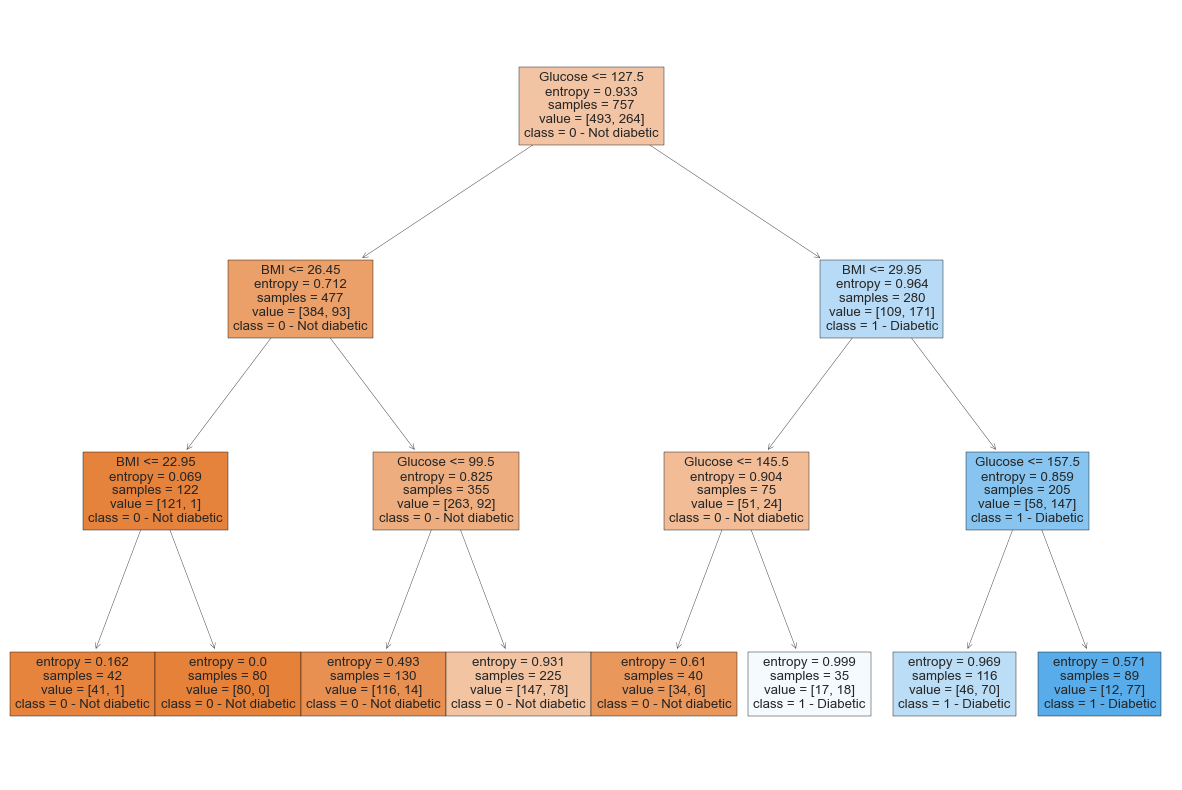

In [47]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

In [48]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))
# Predicted class: [1]

Predicted class: [1]


In [49]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

# Predicted probabilities: [[0.135 0.865]]

Predicted probabilities: [[0.135 0.865]]


In [50]:
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(40, 200, 0.1),
        np.arange(10, 80, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

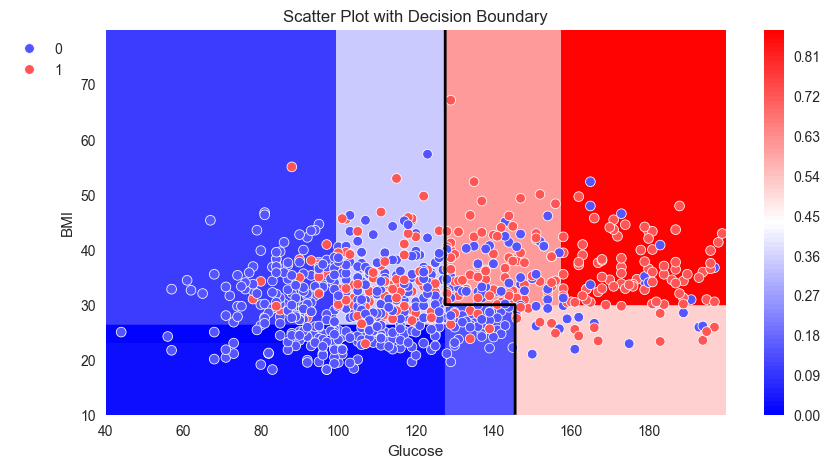

In [51]:
plot_probabilities_2d(X, y, dt_clf_2d)

In [52]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_2d.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [53]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART без ограничения его длины
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
#Делаем предсказание класса для всего набора данных
y_pred = dt_clf_bad.predict(X)
#Выводим отчёт о метриках классификации
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



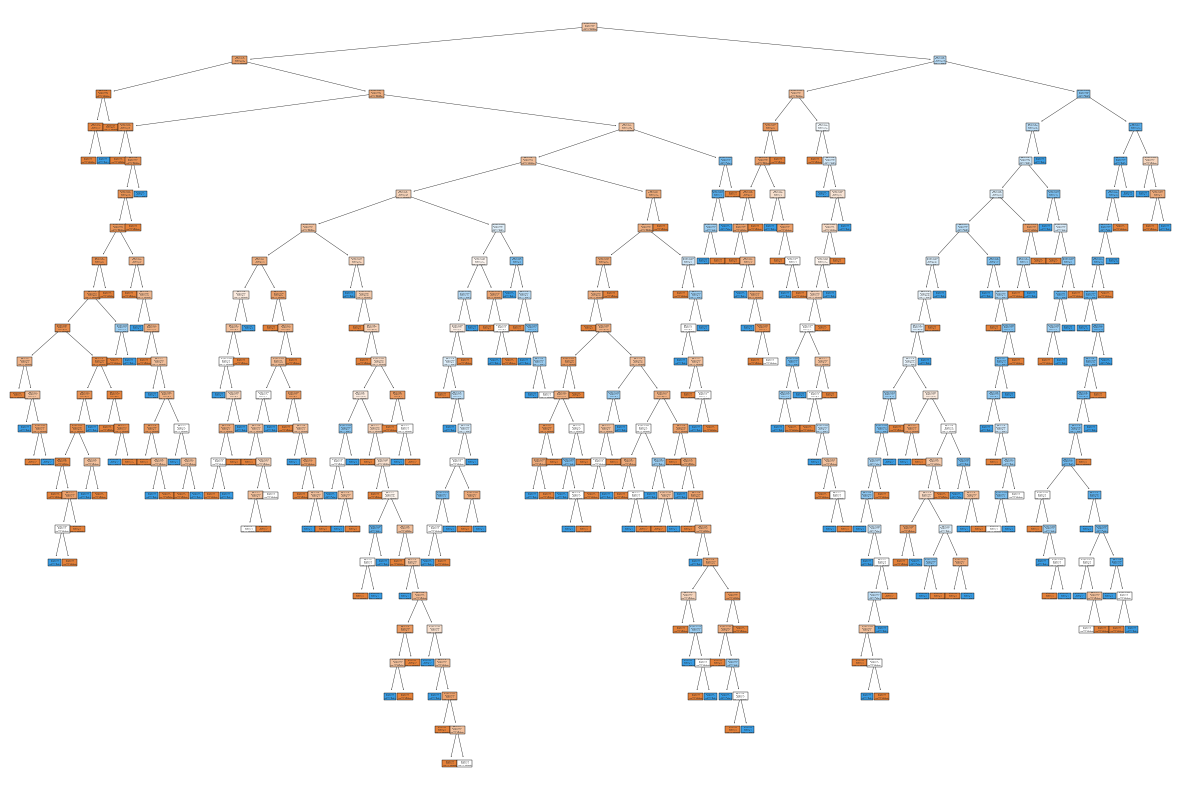

In [55]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф 
tree_graph = tree.plot_tree(
    dt_clf_bad, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

In [56]:
dt_clf_bad.get_depth()
# 22

22

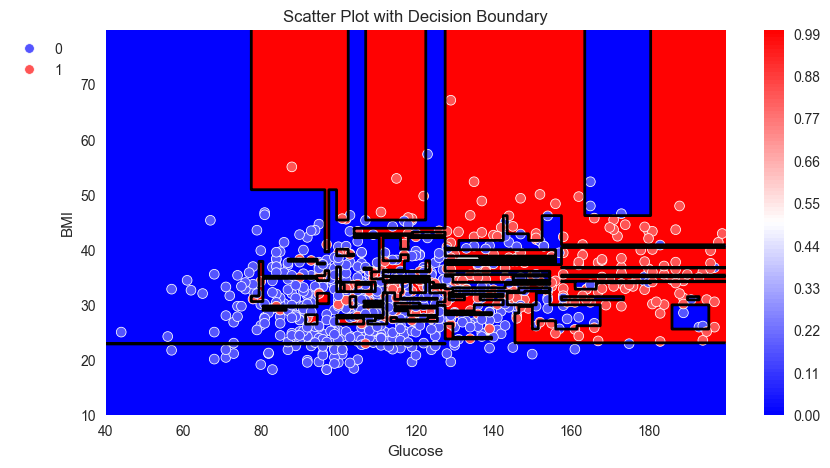

In [57]:
plot_probabilities_2d(X, y, dt_clf_bad)

In [58]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [59]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    max_depth=6, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
#Обучаем модель по алгоритму CART
dt_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = dt_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



In [61]:
print(dt_clf_full.feature_importances_)
# [0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465 0.14000868]

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


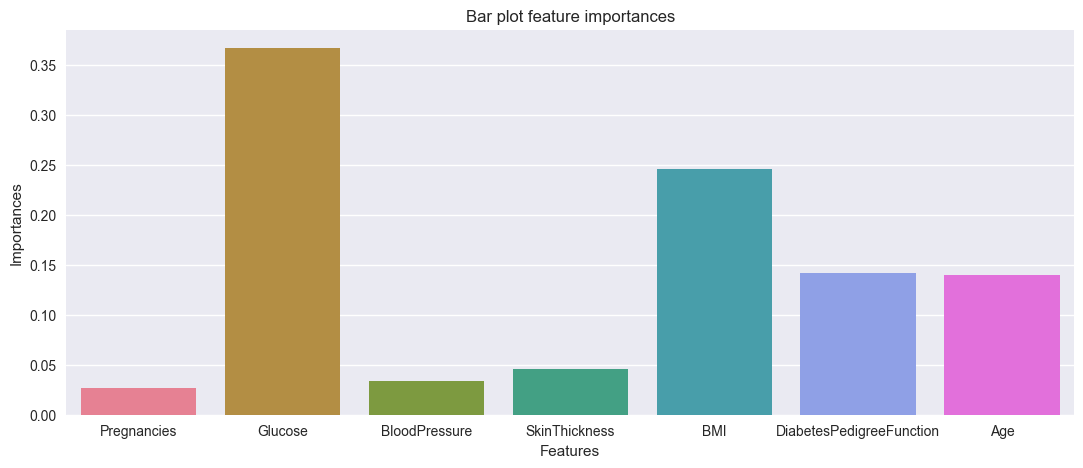

In [64]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = dt_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax, hue=feature);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [66]:
# Задание 6.10
# Для выполнения задания используйте датасет о диабете из данного модуля. Для обучения используйте все доступные признаки.
# Обучите дерево решений с максимальной глубиной 6 и критерием информативности Джини. В качестве значения параметра random_state возьмите число 42.
# Сделайте предсказание и рассчитайте F1-меру.
# Чему равно значение метрики? Ответ запишите с точностью до второго знака после точки-разделителя.

dt_clf_full_g = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)
dt_clf_full_g.fit(X, y)
 
y_pred_g = dt_clf_full_g.predict(X)
print(round(metrics.f1_score(y, y_pred_g), 2))

0.78


---
### 7. Введение в ансамбли: бэггинг. Случайный лес

##### СЛУЧАЙНЫЙ ЛЕС В SKLEARN

In [68]:
from sklearn import ensemble

In [69]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


In [70]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Основные параметры RandomForestClassifier

* `n_estimators` — количество деревьев в лесу (число K из бэггинга; по умолчанию равно 100);
* `criterion` — критерий информативности разбиения для каждого из деревьев ('gini' — критерий Джини и 'entropy' — энтропия Шеннона; по умолчанию — 'gini');
* `max_depth` — максимальная глубина одного дерева (по умолчанию — None, то есть глубина дерева не ограничена);
* `max_features` — максимальное число признаков, которые будут использоваться каждым из деревьев (число L из метода случайных подпространств; по умолчанию — 'sqrt'; для обучения каждого из деревьев используется $\sqrt{m}$ признаков, где m — число признаков в начальном наборе данных);
* `min_samples_leaf` — минимальное число объектов в листе (по умолчанию — 1);
* `random_state` — параметр, отвечающий за генерацию случайных чисел.

In [71]:
#Создаём объект класса RandomForestClassifier
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=3, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       493
           1       0.73      0.57      0.64       264

    accuracy                           0.78       757
   macro avg       0.76      0.73      0.74       757
weighted avg       0.77      0.78      0.77       757



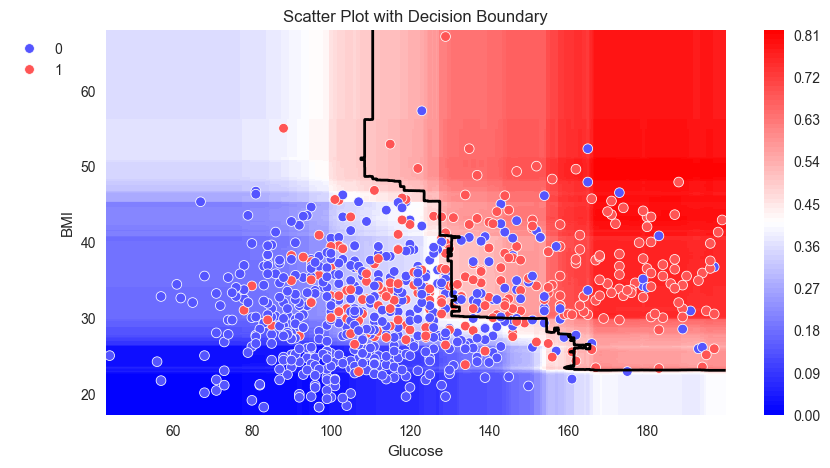

In [72]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость (линию, где вероятность равна 0.5)
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))
plot_probabilities_2d(X, y, rf_clf_2d)

In [73]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']
 
 
#Создаём объект класса RandomForestClassifier
rf_clf_full = ensemble.RandomForestClassifier(
    n_estimators=300, #число деревьев
    criterion='entropy', #критерий эффективности
    max_depth=6, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подпространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_full.fit(X, y)
 
#Делаем предсказание класса
y_pred = rf_clf_full.predict(X)
#Выводим отчёт о метриках
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       493
           1       0.85      0.77      0.80       264

    accuracy                           0.87       757
   macro avg       0.86      0.85      0.85       757
weighted avg       0.87      0.87      0.87       757



In [74]:
rf_clf_full.predict_proba(X)

array([[0.7186633 , 0.2813367 ],
       [0.85222366, 0.14777634],
       [0.88358167, 0.11641833],
       ...,
       [0.28908312, 0.71091688],
       [0.44280536, 0.55719464],
       [0.94476689, 0.05523311]])

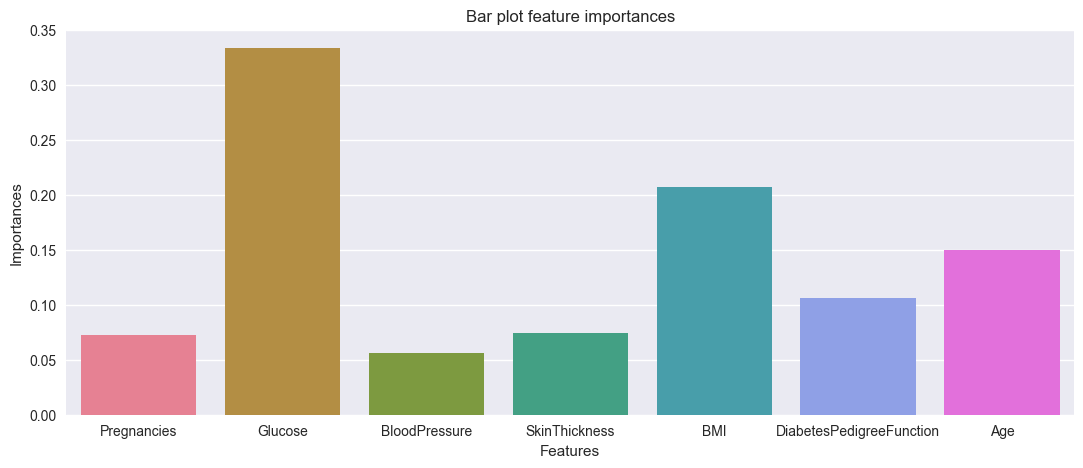

In [77]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X.columns #признаки
feature_importances = rf_clf_full.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax, hue=feature);
#Добавляем подпись графику, осям абсцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

In [80]:
# Задание 7.5
# Скачайте набор данных о винах. Вам необходимо будет предсказать качество вина по его характеристикам.
# Для начала подготовим данные к бинарной классификации. Условно разделим вино на хорошее и плохое. 
# Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.
wine_data = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
# Затем разделим выборку на тренировочную и тестовую:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучите на тренировочной выборке (X_train, y_train) модель случайного леса, состоящего из 500 деревьев. 
# Максимальная глубина каждого из деревьев — 8. Минимальное число объектов в листе — 10. 
# В качестве критерия информативности используйте критерий Джини. 
# Количество признаков, на которых обучается каждое из деревьев, возьмите как sqre(m), где m — общее количество признаков. 
# В качестве значения параметра random_state возьмите число 42.
# Сделайте предсказание качества вина для тренировочного и тестового наборов данных.
# Рассчитайте метрику accuracy для каждого набора и запишите её в качестве ответа с точностью до двух знаков после точки-разделителя.
rf_clf_w = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_leaf = 10,
    max_features='sqrt',
    random_state=42
)
#Обучаем модель 
rf_clf_w.fit(X_train, y_train)
#Делаем предсказание класса
y_pred_train = rf_clf_w.predict(X_train)
y_pred_test = rf_clf_w.predict(X_test)
#Выводим отчёт о метриках
print(f'Accuracy for train: {round(metrics.accuracy_score(y_train, y_pred_train), 2)}')
print(f'Accuracy for test: {round(metrics.accuracy_score(y_test, y_pred_test), 2)}')

Accuracy for train: 0.85
Accuracy for test: 0.75
